# 3-Body Initializer

## Contributers

- Martin Lopez Jr.
- Dr. Aldo Batta

## Purpose

Analyze [3-body trajectories](https://en.wikipedia.org/wiki/Three-body_problem) of a [binary black hole (BBH)](https://en.wikipedia.org/wiki/Binary_black_hole) and a sun-like star and produce an initial conditions file if certain criteria are met. The criteria for creating an initial condition file is whether the sun-like star gets within the tidal radius of either black hole (BH), thereby resulting in a [tidal disruption event (TDE)](https://en.wikipedia.org/wiki/Tidal_disruption_event), and the BBH remains intact leading to the possibility of multiple TDEs. 

# Header

In [2]:
%matplotlib inline

# analysis packages
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.io import ascii
from scipy.integrate import odeint
from fractions import Fraction

# plotting packages
import seaborn as sns
sns.set_style('ticks')
from mpl_toolkits.mplot3d import Axes3D

# custom packages
import BinaryBHOrbit as bhb
import SetUpSim as SUS

# constants
day = 60*60*24                  # seconds in a day
hrs = 60*60                     # seconds in an hr
G = 6.67e-8                     # gravitational constant
AU = 1.49597870e+13             # astronomical unit
Mo = 1.989e33                   # solar mass
Ro=6.96e10                      # solar radius
tdyn = np.sqrt(Ro**3/(G*Mo))    # solar free-fall time

Constants defined...


# Define initial system properties

In [3]:
reload(SUS)

#=====================
#Binary properties
#=====================
m1 = 15*Mo
m2 = 15*Mo
a = 0.1 * AU
e = 0

#=====================
#3rd body properties
#=====================
m3 = 1 * Mo/1e0
Rstar = 43 * Ro
v_inf = 10e5

print Rstar/Ro
e3 = 1 # eccentricity

# 3rd body orbital inclination (rotates along Y)
i = 0

# Obtain tidal radius
rt1 = SUS.tidal(m1,m3,Rstar)
rt2 = SUS.tidal(m2,m3,Rstar)
rtc = SUS.tidal(m1+m2,m3,Rstar)

r = 1 * a # distance to binary's CM
rperi = 1.0 * rtc # desired perihelium distance
r_want = 6.0 * rtc #desired distance to start simulation

print'\nTidal radius [solar]' 
print'-------------------------'
print' rt1   |   rt2   |   rtc'
print round(rt1/Ro,2),'    ', round(rt2/Ro,2),'    ', round(rtc/Ro,2),'\n'


pointto = 'm1'

#=====================
# Load class to create initial conditions and evolve them
bhb_star= bhb.ICs(m1,m2,m3)

# initialvalues,P = icm.get_IC(m1,m2,a,e,m3,r,rperi,e3)
initialvalues,P = bhb_star.get_IC(m1,m2,a,e,m3,r,rperi,e3,i,pointto,v_inf)

print rtc/Ro

43.0

Tidal radius [solar]
-------------------------
 rt1   |   rt2   |   rtc
106.05      106.05      133.61 

Initial masses defined...
  Masses (solar units)
    m1     |     m2     |     m3    
------------------------------------
   14.992        14.992         0.999

Binary properties (m1, m2)
----------------------

Orbital separation: 0.1  AU ( 21.4939468391 solar radius)
Eccentricity: 0
Orbital period: 2.1088  days ( 50.6104  hours)
v1 = 257.9484 , v2 = 258.0 4  km/s
k= 1.98731014545e+20
v= 532.815955145

3rd body orbital properties (m3)
----------------------

Initial distance to binary: 21.4939468391  solar
Initial velocity magnitude |v|: 532.815955145 km/s
Orbital angular momentum k: 1.98731014545e+20  cm^2 / s
Initial true anomaly f: nan  radians
Initial radial velocity (magnitude) dr/dt: nan km/s
Initial tangential velocity (magnitude) df/dt: 1328.43478684 km/s
Final v magnitude = nan  km/s
133.610997756


/Volumes/Drivey/Dropbox/SLUG/GadgetStuff/InitialCond/IC_Mods/BinaryBHOrbit.py:295: RuntimeWarning: invalid value encountered in arccos
  f = np.arccos((k**2 / (mu * r) - 1)/e)
/Volumes/Drivey/Dropbox/SLUG/GadgetStuff/InitialCond/IC_Mods/BinaryBHOrbit.py:300: RuntimeWarning: invalid value encountered in sqrt
  rdot = np.sqrt(v**2 - (fdot*r)**2)


# Run the numerical integration

In [4]:
# initialvalues,P = icm.get_IC(m1,m2,a,e,m3,r,rperi,e3)
initialvalues,P = bhb_star.get_IC(m1,m2,a,e,m3,r,rperi,e3,i,pointto,v_inf)

num = 100

# ========================================
# Define dt and Time to integrate
# ========================================
dt = P/2e4
tmax = max(1*day,num*P)
nsteps = int(tmax/dt + 1)
# Specify a set of times to find the solution
times = np.linspace(0,tmax,nsteps)
print 'dt = ',dt/day, ' day ', dt, ' sec'

# =====================================================================
# Advance positions and velocities in time using a numerical method
# =====================================================================

# initialize array with evolving quantities
pos_vel_array = initialvalues

# Evolve with RK4
result = bhb_star.RK4(times,pos_vel_array,bhb_star.threebody_derivs)



# ========================================
# Create Tables for plotting and handling
# ========================================
column_names = ['x1','y1','z1','vx1','vy1','vz1','x2','y2','z2','vx2','vy2','vz2','x3','y3','z3','vx3','vy3','vz3']
sol = Table(result,names=column_names)
# add the times column
sol['t'] = times

  Masses (solar units)
    m1     |     m2     |     m3    
------------------------------------
   14.992        14.992         0.999

Binary properties (m1, m2)
----------------------

Orbital separation: 0.1  AU ( 21.4939468391 solar radius)
Eccentricity: 0
Orbital period: 2.1088  days ( 50.6104  hours)
v1 = 257.9484 , v2 = 258.0 4  km/s
k= 1.98731014545e+20
v= 532.815955145

3rd body orbital properties (m3)
----------------------

Initial distance to binary: 21.4939468391  solar
Initial velocity magnitude |v|: 532.815955145 km/s
Orbital angular momentum k: 1.98731014545e+20  cm^2 / s
Initial true anomaly f: nan  radians
Initial radial velocity (magnitude) dr/dt: nan km/s
Initial tangential velocity (magnitude) df/dt: 1328.43478684 km/s
Final v magnitude = nan  km/s
dt =  0.00010543836934932771  day  9.109875111781914  sec


# Plot and print the results

Closest aproach to binary CM (solar radii)
54.456
Closest aproach to 1 (solar radii)
54.456
Closest aproach to 2 (solar radii)
2487.961

100.0\% of the star is inside of the tidal radius

-------------------------
-------------------------
r offset =  202.68  rtc =  21493.95  Ro
r peri =  1.0  rtc =  106.05  Ro
-------------------------
-------------------------
21493.94683908046 15118.47927573985
15118.47927573985 21493.94683908046 21493.9468391


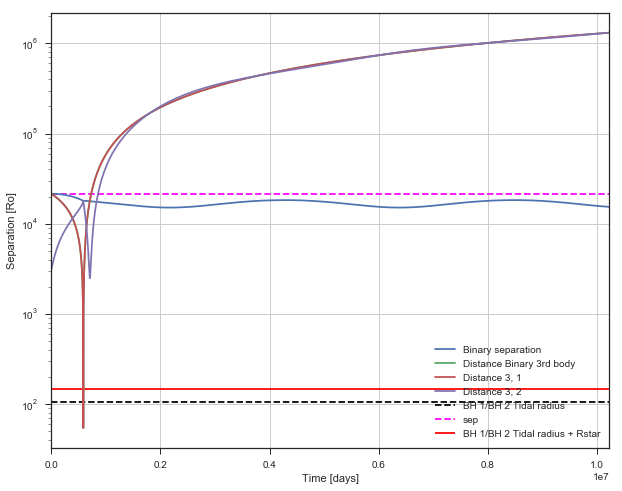

In [16]:
tscale = tdyn

# Get Binary Center of Mass
sol['CMx'] = ( m1*sol['x1'] + m2*sol['x2'] )/(m1 + m2)
sol['CMy'] = ( m1*sol['y1'] + m2*sol['y2'] )/(m1 + m2)
sol['CMz'] = ( m1*sol['z1'] + m2*sol['z2'] )/(m1 + m2)

sol['r1_2'] = np.sqrt( (sol['x1']-sol['x2'])**2 + (sol['y1']-sol['y2'])**2 + (sol['z1']-sol['z2'])**2)
sol['r3_1'] = np.sqrt( (sol['x3']-sol['x1'])**2 + (sol['y3']-sol['y1'])**2 + (sol['z3']-sol['z1'])**2)
sol['r3_2'] = np.sqrt( (sol['x3']-sol['x2'])**2 + (sol['y3']-sol['y2'])**2 + (sol['z3']-sol['z2'])**2)
sol['r3_12'] = np.sqrt( (sol['x3']-sol['CMx'])**2 + (sol['y3']-sol['CMy'])**2 +(sol['z3']-sol['CMz'])**2)

pl.figure(figsize=(10,8))
pl.plot(sol['t']/tscale,sol['r1_2']/Ro,label='Binary separation')
pl.plot(sol['t']/tscale,sol['r3_12']/Ro,label='Distance Binary 3rd body')
pl.plot(sol['t']/tscale,sol['r3_1']/Ro,label='Distance 3, 1')
pl.plot(sol['t']/tscale,sol['r3_2']/Ro,label='Distance 3, 2')

pl.hlines(rt1/Ro,sol['t'][0]/tscale,sol['t'][-1]/tscale,linestyle = '--',label='BH 1/BH 2 Tidal radius')
pl.hlines(a/Ro,sol['t'][0]/tscale,sol['t'][-1]/tscale,linestyle = '--', color = 'magenta',label='sep')
pl.hlines(rt1/Ro + Rstar/Ro,sol['t'][0]/tscale,sol['t'][-1]/tscale,'r',linestyle = '-',label='BH 1/BH 2 Tidal radius + Rstar')
# pl.hlines(rt2/Ro,sol['t'][0],sol['t'][-1])
pl.xlabel('Time [days]')
pl.ylabel('Separation [Ro]')
pl.legend(frameon=False,loc=0)
pl.semilogy()
pl.grid()
pl.xlim(sol['t'][0]/tscale,sol['t'][-1]/tscale)
# pl.savefig('5M3R_0.1AU.pdf')
# pl.xlim(0,2000)
# pl.ylim(1e-1,5)

BH1_close = min(sol['r3_1'])
BH2_close = min(sol['r3_2'])

print 'Closest aproach to binary CM (solar radii)'
print round(min(sol['r3_12']/Ro),3)

print 'Closest aproach to 1 (solar radii)'
print round(min(sol['r3_1']/Ro),3)

print 'Closest aproach to 2 (solar radii)'
print round(min(sol['r3_2']/Ro),3)

closest = np.min([BH1_close,BH2_close])

if closest == BH1_close:
    rtau = rt1
elif closest == BH2_close:
    rtau = rt2
    
SUS.inside_tide(Rstar,closest,rtau)


print'\n-------------------------'
print'-------------------------'
print 'r offset = ', round(r/rtc,2), ' rtc = ', round(r/Ro,2), ' Ro'
print 'r peri = ', round(rperi/rtc,2), ' rtc = ', round(rperi/Ro,2), ' Ro'
print'-------------------------'
print'-------------------------'

print np.max(sol['r1_2'])/Ro, np.min(sol['r1_2'])/Ro

print min(sol['r1_2']/Ro), max(sol['r1_2']/Ro), a/Ro


# Simulation Info

In [19]:
reload(SUS)
SUS.make_coord_table(sol, r_want, Rstar, rt1, rt2, rtc, which_BH = 1., which_min_2 = 1,tfactor= 8./9.,
                     energy = True,
                     write_out = True,
                     a = a,
                     m1 = m1,
                     m2 = m2,
                     m3 = m3,
                     r = r,
                     rperi = rperi,
                     v_inf = v_inf)

print'\n-------------------------'
print'-------------------------'
print 'r offset = ', round(r/rtc,2), ' rtc = ', round(r/Ro,2), ' Ro'
print 'r peri = ', round(rperi/rtc,2), ' rtc = ', round(rperi/Ro,2), ' Ro'
print'-------------------------'
print'-------------------------'


For BH 1
-------------------------

Number of minimums: 1

Minimum number 1 has been chosen

Chosen minimum is: 54.46 Ro
**************************

For BH 2
-------------------------

Number of minimums: 1

Minimum number 1 has been chosen

Chosen minimum is: 2487.96 Ro
**************************

The desired starting distance to BH 1 = 636.28Ro = 6.0rtc

The actual starting distance to BH 1 = 642.4Ro = 6.06rtc

Chosen closest aproach to 1 (solar radii)
54.456

Chosen closest aproach to 2 (solar radii)
2487.961

Peri time: 588811.58 [t_dyn] = 10864.16 [days]
0.89 Peri time: 523388.07 [t_dyn] = 9657.03 [days]
Time of desired distance: 586255.98 [t_dyn] = 10817.01 [days]

100.0\% of the star is inside of the tidal radius

-------------------------
-------------------------
Energy of star in BH1 orbit is: 1.72e+46 [ergs]
Energy of star in BH2 orbit is: 4.66e+46 [ergs]
-------------------------
-------------------------

Writing to IC_Coord/1M43R10kms-15M0M_21493r106rp642R.dat

---------

# Plot the orbits

/Users/martinlopezjr/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_base.py:2961: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  'left=%s, right=%s') % (left, right))


Text(0.5,1,u"Rest frame at initial Binary's CM")

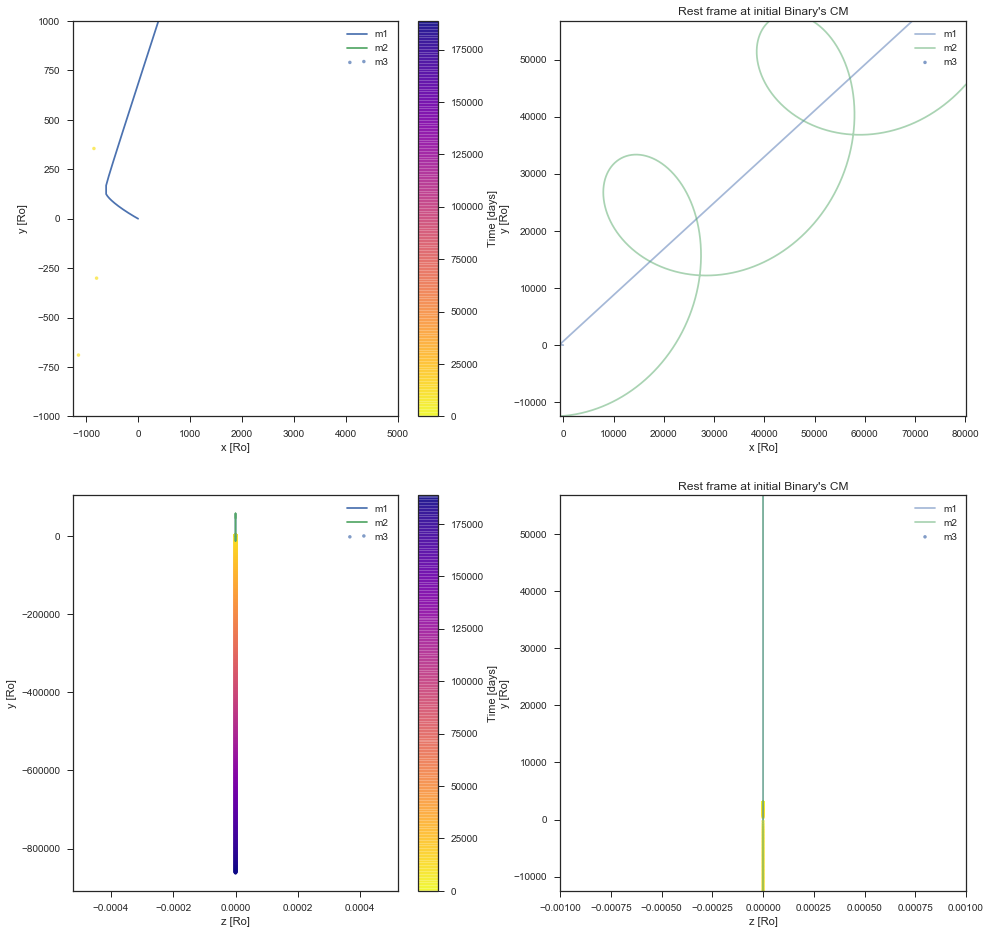

In [28]:
# ======================================================
# Define how often (in time) we want to plot
# ======================================================
sl = 10


pl.figure(figsize=(16,16))

# ------------------
# Plot Binary
# ------------------

# Scatter plot for binary (coloring points according to time)
# f1 = scatter(sol['x1'][::sl]/AU,sol['y1'][::sl]/AU,marker='.',c = sol['t'][::sl]/hrs
#         ,cmap=cm.BrBG,alpha=0.7,edgecolor='None',label='m1')
# f2 = scatter(sol['x2'][::sl]/AU,sol['y2'][::sl]/AU,marker='.',c = sol['t'][::sl]/hrs
#         ,cmap=cm.YlOrRd_r,alpha=0.7,edgecolor='None',label='m2')

# legend1.legendHandles[0].set_color(cm.viridis(.8))
# legend1.legendHandles[1].set_color(cm.Reds(.8))

pl.subplot(2,2,1)

f1 = pl.plot(sol['x1'][::sl]/Ro,sol['y1'][::sl]/Ro,label='m1')
f2 = pl.plot(sol['x2'][::sl]/Ro,sol['y2'][::sl]/Ro,label='m2')

# ------------------
#  Plot 3rd body
# ------------------

f3 = pl.scatter(sol['x3'][::sl]/Ro,sol['y3'][::sl]/Ro,marker='.',c = sol['t'][::sl]/day
        ,cmap=pl.cm.plasma_r,alpha=0.7,edgecolor='None',label='m3')

# legend1.legendHandles[2].set_color(cm.plasma(.8))

pl.legend(loc='best',scatterpoints=2)
pl.colorbar(label='Time [days]')


# This allows to specify the color used for the legend of each plot when using scatter
ax = pl.gca()
legend1 = ax.get_legend()

pl.ylim(-1000,1000)
pl.xlim(-1250,5000)

pl.xlabel('x [Ro]')
pl.ylabel('y [Ro]')
# xlim(-0.01,0.01)
# ylim(-0.01,0.01)


#--------------------
# Zoom in (binary)
#--------------------
pl.subplot(2,2,2)

f1 = pl.plot(sol['x1'][::sl]/Ro,sol['y1'][::sl]/Ro,'-',alpha=0.5,label='m1')
f2 = pl.plot(sol['x2'][::sl]/Ro,sol['y2'][::sl]/Ro,'-',alpha=0.5,label='m2')

f3 = pl.scatter(sol['x3'][::sl]/Ro,sol['y3'][::sl]/Ro,marker='.',c = sol['t'][::sl]/day
        ,cmap=pl.cm.plasma_r,alpha=0.7,edgecolor='None',label='m3')

pl.ylim(min(sol['y2'][::sl]/Ro), max(sol['y1'][::sl]/Ro))
pl.xlim(min(sol['x1'][::sl]/Ro), max(sol['x2'][::sl]/Ro))

pl.legend(loc='best',scatterpoints=1)

pl.xlabel('x [Ro]')
pl.ylabel('y [Ro]')
pl.title("Rest frame at initial Binary's CM")
# pl.title("Rest frame at initial Binary's CM")

pl.subplot(2,2,3)

f1 = pl.plot(sol['z1'][::sl]/Ro,sol['y1'][::sl]/Ro,label='m1')
f2 = pl.plot(sol['z2'][::sl]/Ro,sol['y2'][::sl]/Ro,label='m2')

# ------------------
#  Plot 3rd body
# ------------------

f3 = pl.scatter(sol['z3'][::sl]/Ro,sol['y3'][::sl]/Ro,marker='.',c = sol['t'][::sl]/day
        ,cmap=pl.cm.plasma_r,alpha=0.7,edgecolor='None',label='m3')

# legend1.legendHandles[2].set_color(cm.plasma(.8))

pl.legend(loc='best',scatterpoints=2)
pl.colorbar(label='Time [days]')


# This allows to specify the color used for the legend of each plot when using scatter
ax = pl.gca()
legend1 = ax.get_legend()



pl.xlabel('z [Ro]')
pl.ylabel('y [Ro]')
# xlim(-0.01,0.01)
# ylim(-0.01,0.01)


#--------------------
# Zoom in (binary)
#--------------------
pl.subplot(2,2,4)

f1 = pl.plot(sol['z1'][::sl]/Ro,sol['y1'][::sl]/Ro,'-',alpha=0.5,label='m1')
f2 = pl.plot(sol['z2'][::sl]/Ro,sol['y2'][::sl]/Ro,'-',alpha=0.5,label='m2')

f3 = pl.scatter(sol['z3'][::sl]/Ro,sol['y3'][::sl]/Ro,marker='.',c = sol['t'][::sl]/day
        ,cmap=pl.cm.plasma_r,alpha=0.7,edgecolor='None',label='m3')

pl.ylim(min(sol['y2'][::sl]/Ro), max(sol['y1'][::sl]/Ro))
pl.xlim(min(sol['z1'][::sl]/Ro), max(sol['z2'][::sl]/Ro))

pl.legend(loc='best',scatterpoints=1)

pl.xlabel('z [Ro]')
pl.ylabel('y [Ro]')
pl.title("Rest frame at initial Binary's CM")

# pl.savefig('1AUBin_3Body.pdf')

Text(0.5,1,u"Rest frame at Binary's CM")

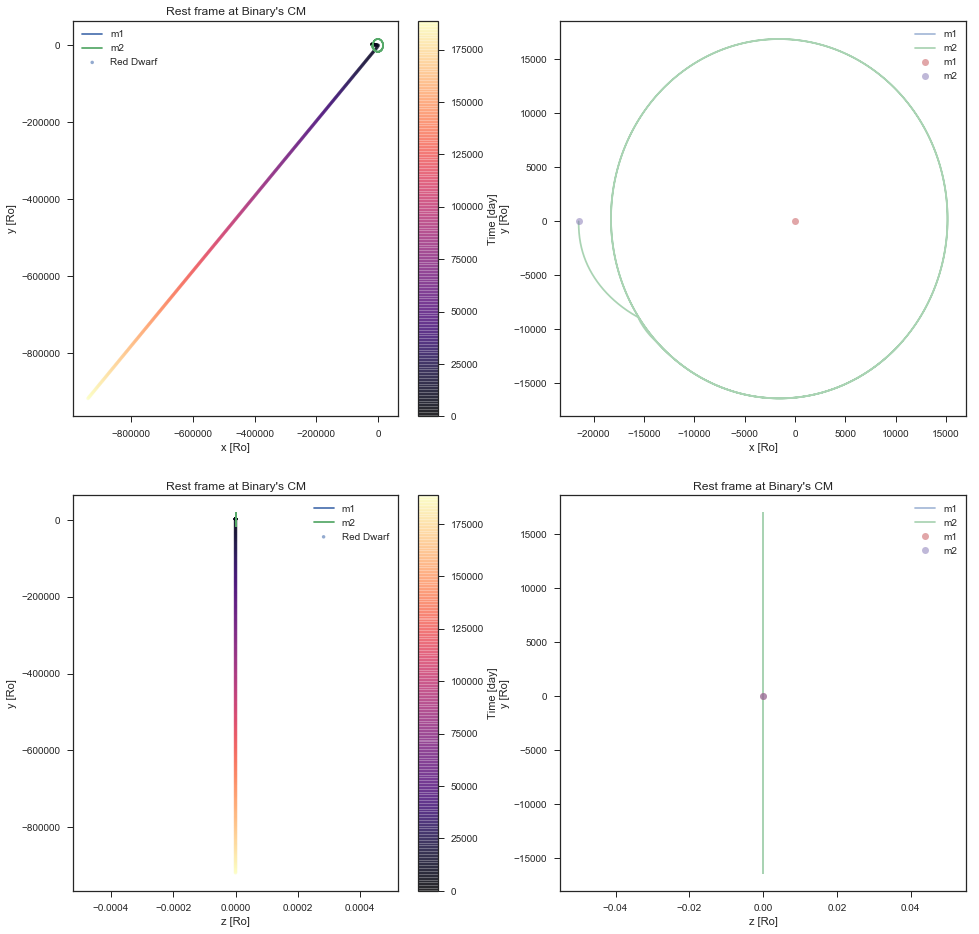

In [29]:
# ======================================================
# Plot solution from the Center of mass rest frame
# ======================================================

sl = 100


pl.figure(figsize=(16,16))


pl.subplot(2,2,1)

# Get Binary Center of Mass
sol['CMx'] = ( m1*sol['x1'] + m2*sol['x2'] )/(m1 + m2)
sol['CMy'] = ( m1*sol['y1'] + m2*sol['y2'] )/(m1 + m2)
sol['CMz'] = ( m1*sol['z1'] + m2*sol['z2'] )/(m1 + m2)

# ======================================================
# Plot solution form the Center of mass rest frame at (x0s,y0s)
# ======================================================

f1 = pl.plot((sol['x1'][::sl]-sol['CMx'][::sl])/Ro,(sol['y1'][::sl]-sol['CMy'][::sl])/Ro,label='m1')

f2 = pl.plot((sol['x2'][::sl]-sol['CMx'][::sl])/Ro,(sol['y2'][::sl]-sol['CMy'][::sl])/Ro,label='m2')
f3 = pl.scatter((sol['x3'][::sl]-sol['CMx'][::sl])/Ro,(sol['y3'][::sl]-sol['CMy'][::sl])/Ro,marker='.',c = sol['t'][::sl]/day
        ,cmap=pl.cm.magma,alpha=0.6,edgecolor='None',label='Red Dwarf')

pl.colorbar(label='Time [day]')
pl.legend(loc='best',scatterpoints=1)


# This allows to specify the color used for the legend of each plot when using scatter
ax = pl.gca()
# legend1 = ax.get_legend()
# legend1.legendHandles[0].set_color(cm.viridis(.8))
# legend1.legendHandles[1].set_color(cm.Reds(.8))
# legend1.legendHandles[2].set_color(cm.plasma(.8))


# plot(sol['x'],sol['y'])
# axis('equal')
# pl.xlim(80,150)
# pl.ylim(-50,50)
pl.xlabel('x [Ro]')
pl.ylabel('y [Ro]')
pl.title("Rest frame at Binary's CM")


pl.subplot(2,2,2)

f1 = pl.plot((sol['x1'][::sl]-sol['CMx'][::sl])/Ro,(sol['y1'][::sl]-sol['CMy'][::sl])/Ro,'-',alpha=0.5,label='m1')
f2 = pl.plot((sol['x2'][::sl]-sol['CMx'][::sl])/Ro,(sol['y2'][::sl]-sol['CMy'][::sl])/Ro,'-',alpha=0.5,label='m2')

pl.plot((sol['x1'][0]-sol['CMx'][0])/Ro,(sol['y1'][0]-sol['CMy'][0])/Ro,'o',alpha=0.5,label='m1')
pl.plot((sol['x2'][0]-sol['CMx'][0])/Ro,(sol['y2'][0]-sol['CMy'][0])/Ro,'o',alpha=0.5,label='m2')

pl.legend(loc='best',scatterpoints=1)

pl.xlabel('x [Ro]')
pl.ylabel('y [Ro]')


pl.subplot(2,2,3)


# ======================================================
# Plot solution form the Center of mass rest frame at (x0s,y0s)
# ======================================================

f1 = pl.plot((sol['z1'][::sl]-sol['CMz'][::sl])/Ro,(sol['y1'][::sl]-sol['CMy'][::sl])/Ro,label='m1')

f2 = pl.plot((sol['z2'][::sl]-sol['CMz'][::sl])/Ro,(sol['y2'][::sl]-sol['CMy'][::sl])/Ro,label='m2')
f3 = pl.scatter((sol['z3'][::sl]-sol['CMz'][::sl])/Ro,(sol['y3'][::sl]-sol['CMy'][::sl])/Ro,marker='.',c = sol['t'][::sl]/day
        ,cmap=pl.cm.magma,alpha=0.6,edgecolor='None',label='Red Dwarf')

pl.colorbar(label='Time [day]')
pl.legend(loc='best',scatterpoints=1)


# This allows to specify the color used for the legend of each plot when using scatter
ax = pl.gca()
# legend1 = ax.get_legend()
# legend1.legendHandles[0].set_color(cm.viridis(.8))
# legend1.legendHandles[1].set_color(cm.Reds(.8))
# legend1.legendHandles[2].set_color(cm.plasma(.8))


# plot(sol['x'],sol['y'])
# axis('equal')

pl.xlabel('z [Ro]')
pl.ylabel('y [Ro]')
pl.title("Rest frame at Binary's CM")


pl.subplot(2,2,4)

f1 = pl.plot((sol['z1'][::sl]-sol['CMz'][::sl])/Ro,(sol['y1'][::sl]-sol['CMy'][::sl])/Ro,'-',alpha=0.5,label='m1')
f2 = pl.plot((sol['z2'][::sl]-sol['CMz'][::sl])/Ro,(sol['y2'][::sl]-sol['CMy'][::sl])/Ro,'-',alpha=0.5,label='m2')

pl.plot((sol['z1'][0]-sol['CMz'][0])/Ro,(sol['y1'][0]-sol['CMy'][0])/Ro,'o',alpha=0.5,label='m1')
pl.plot((sol['z2'][0]-sol['CMz'][0])/Ro,(sol['y2'][0]-sol['CMy'][0])/Ro,'o',alpha=0.5,label='m2')

pl.legend(loc='best',scatterpoints=1)

pl.xlabel('z [Ro]')
pl.ylabel('y [Ro]')

pl.title("Rest frame at Binary's CM")

